<a href="https://colab.research.google.com/github/myungjinma/acorn_python/blob/main/0810_65%EC%9D%BC%EC%B0%A8_ML(SVD%2C_KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from numpy.linalg import svd

In [5]:
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [7]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix : \n',np.round(U, 3))
print('Sigma Value : \n', np.round(Sigma,3))
print('V transpose matrix : \n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix : 
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value : 
 [3.423 2.023 0.463 0.079]
V transpose matrix : 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [8]:
Sigma_mat = np.diag(Sigma)

In [9]:
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [10]:
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

(4, 2) (2, 2) (2, 4)


In [11]:
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

[[ 0.118 -0.422 -0.451 -0.303]
 [-0.265  1.188  1.62   0.38 ]
 [ 0.083  0.528  1.784 -1.258]
 [ 0.305 -0.107  1.341 -2.03 ]]


In [12]:
a[2] = a[0] + a[1]
a[3]= a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [13]:
U, Sigma, Vt = svd(a)

In [14]:
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

(4, 2) (2, 2) (2, 4)


In [15]:
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


KNN (K- Nearest Neighbor)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [18]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 4.9 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=1e671bbbd35b54a793528e18dc60c2a5965aa231c8f82cd7248caba79b929f5d
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [19]:
import mglearn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


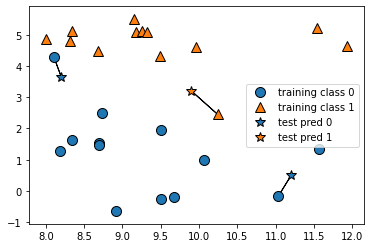

In [21]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

X.shape : (26, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


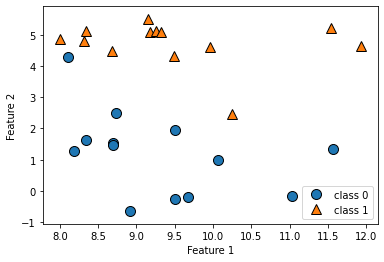

In [22]:
#데이터셋을 만듭니다.
X , y= mglearn.datasets.make_forge()
#산정도를 그립니다.
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(['class 0', 'class 1'], loc=4)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
print('X.shape :', X.shape)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [25]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
print('테스트 세트 예측: ', clf.predict(X_test))

테스트 세트 예측:  [1 0 1 0 1 0 0]


In [27]:
print('테스트 세트 정확도 : {:.2f}'.format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.86


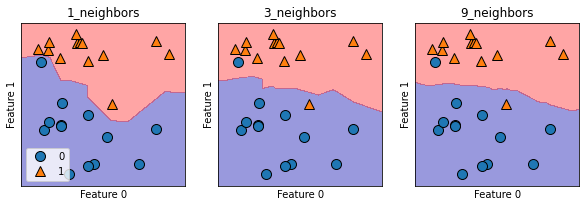

In [28]:
fig, axes = plt.subplots(1, 3, figsize =(10, 3))
for n_neighbors , ax in zip([1,3,9], axes):
  #fit 메소드는 self 오브젝트를 리턴합니다.
  # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다.
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X , fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:,0], X[:, 1], y , ax=ax)
  ax.set_title('{}_neighbors'.format(n_neighbors))
  ax.set_xlabel('Feature 0')
  ax.set_ylabel('Feature 1')

axes[0].legend(loc=3)
plt.show()

In [29]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []

In [30]:
neighbors_settings = range(1, 11)

In [31]:
for n_neighbors in neighbors_settings:
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  #훈련 세트 정확도
  training_accuracy.append(clf.score(X_train, y_train))
  #일반화 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

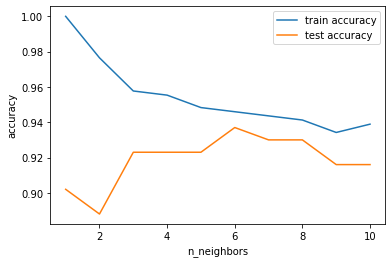

In [32]:
plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [34]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#Assign column names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

#Read dataset to pandas dataframe
dataset = pd.read_csv(url, names = names)

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
#Preprocessing
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20)

#Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9666666666666667

In [38]:
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [39]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 7  0  0]
 [ 0 13  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [41]:
neighbors = [k for k in range(50) if k%2 !=0]

In [42]:
neighbors

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49]

1. cross_val_score 를 for문으로 실행하여 , score가 최고인 경우의 n_neighbors 찾아 내기

    조건 :


```
# 코드로 형식 지정됨
```


      neighbors = [ k for k in range(50) if k%2 !=0]

      for neighbor in neighbors:
      
      cv =5

    n_neighbors 별 score 구하고 그래프 그려보기

2. 같은 조건으로 GridSearchCV 수행하고 1번과의 결과 비교해보기